Taller 2

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import integrate
import pandas as pd
from matplotlib import rc
import os.path as path
import os

Derivación

8

In [ ]:
#falta

Raíces de Polinomios

5

In [15]:
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)
n = 19



In [88]:
def GetLaguerre(n,x):
    
    y= ((np.e)**(-x))*(x**n)
    
    poly = ((np.e**x)*sym.diff( y,x,n ))/(np.math.factorial(n))
    
    return poly

In [89]:
a = sym.Symbol("a")
GetLaguerre(10,a)

2.75573192239859e-7*a**10 - 2.75573192239859e-5*a**9 + 0.00111607142857143*a**8 - 0.0238095238095238*a**7 + 0.291666666666667*a**6 - 2.1*a**5 + 8.75*a**4 - 20.0*a**3 + 22.5*a**2 - 10.0*a + 1

In [90]:
Laguerre = []
DLaguerre = []
x = sym.Symbol("x")
for i in range(0, n+1):
    Poly = GetLaguerre(i,x)
    Laguerre.append(Poly)
    DLaguerre.append( sym.diff(Poly,x) )

In [91]:
len(DLaguerre)

20

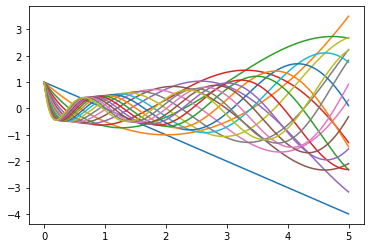

In [92]:
_x=np.linspace(0,5,1000)

for i, p in enumerate(Laguerre):
    if i!= 0:
        pn = sym.lambdify([x],p,'numpy')
        plt.plot(_x,pn(_x))

In [93]:
def GetNewton(f,df,xn,itmax=10000,precision=1e-14):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn

In [94]:
def GetRoots(f,df,x,tolerancia = 14):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewton(f,df,i)
        
        if root != False:
            
            croot = np.round( root, tolerancia )
            
            if croot not in Roots:
                Roots = np.append(Roots, croot)
                
    Roots.sort()
    
    return Roots

In [95]:
def GetAllRoots(n,xn,Laguerre,DLaguerre):
    
    poly = sym.lambdify([x],Laguerre[n],'numpy')
    Dpoly = sym.lambdify([x],DLaguerre[n],'numpy')
    Roots = GetRoots(poly,Dpoly,xn)
    
    return Roots

In [96]:
root_=[]
conteo=0

while conteo<19:
    xn = np.linspace(0,10,20)
    n=conteo+1
    Roots = GetAllRoots(n,xn,Laguerre,DLaguerre)
    root_.append(Roots)
    
    conteo+=1
    
root_
    

[array([1.]),
 array([0.58578644, 3.41421356]),
 array([0.41577456, 2.29428036, 6.28994508]),
 array([0.32254769, 1.7457611 , 4.5366203 , 9.39507091, 9.39507091]),
 array([ 0.26356032,  1.41340306,  3.59642577,  3.59642577,  7.08581001,
         7.08581001,  7.08581001, 12.64080084]),
 array([ 0.2228466 ,  1.1889321 ,  2.99273633,  2.99273633,  5.77514357,
         5.77514357,  5.77514357,  5.77514357,  9.83746742,  9.83746742,
        15.98287398]),
 array([0.19304368, 1.0266649 , 2.56787674, 2.56787674, 4.90035308,
        4.90035308, 4.90035308, 8.18215344, 8.18215344, 8.18215344]),
 array([ 0.17027963,  0.90370178,  2.25108663,  2.25108663,  4.26670017,
         4.26670017,  4.26670017,  4.26670017,  7.0459054 ,  7.0459054 ,
         7.0459054 ,  7.0459054 , 10.75851601, 22.86313174]),
 array([0.15232223, 0.80722002, 2.00513516, 2.00513516, 3.78347397,
        3.78347397, 3.78347397, 3.78347397, 6.20495678]),
 array([0.13779347, 0.72945455, 1.8083429 , 3.4014337 , 5.55249614,
     

Lagrange

1

Sean $C_{0},C_{1},...,C_{n-1}$ los coeficientes del polinomio interpolador $p(x_{i})$ de modo que,
$p(x_{i})=C_{0}+C_{1}x_{i},C_{2}x_{i}^2+...+C_{n-1}x_{i}^{n-1}$ 

Entonces, se puede reescribir en su forma matricial como:

$$\begin{Bmatrix}
1 & + & x_{0} & + & x_{0}^2 & + & \cdots & + & x_{0}^n & = & y_{1}\\
1 & + & x_{1} & + & x_{1}^2 & + & \cdots & + & x_{1}^n & = & y_{1}\\
 \vdots & \vdots  &  \vdots & \vdots  &  \vdots & \vdots & \vdots & \vdots  & \vdots & \vdots  & \vdots  \\
1 & + & x_{n} & + & x_{n}^2 &  + & \cdots & + & x_{n}^n & = & y_{1}
\end{Bmatrix}$$


Obteniendo un sistema de ecuaciones lineales, de la forma:

$$\begin{pmatrix}
1 & x_{0} & x_{0}^2 & \cdots & x_{0}^n\\
1 & x_{1} & x_{1}^2 & \cdots & x_{1}^n\\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n} & x_{n}^2 & \cdots & x_{n}^n
\end{pmatrix}
\begin{pmatrix}
C_{0} \\
C_{1} \\
\vdots \\
C_{n}
\end{pmatrix}
=
\begin{pmatrix}
f(x_{0}) \\
f(x_{1}) \\
\vdots \\
f(x_{n})
\end{pmatrix}$$


De modo que el determinante de esta matrix cumple con la ecuación:

$\prod_{0\leqq i<j\leqq n}(x_{j}-x_{i})$

Este da distinto de cero si para todo $i,j$ , $x_{i}\neq x_{j}$

Esto implica que el sistema tiene una única solución y por ende el polinomio interpolador generado por la Interpolación de Lagrange es único.


4

In [97]:
def cargar(nombre:str)->tuple:
    archivo=open(nombre,mode='r',encoding=("utf8"))
    llaves=archivo.readline().strip()
    linea=archivo.readline().strip()
    y=[]
    x=[]
    
    while len(linea)>0:
        datos=linea.split(",")
        datos[0]
        x.append(float(datos[0]))
        y.append(float(datos[1]))
          
        linea=archivo.readline()
        
    archivo.close()

    return  (x,y)

In [98]:
X,Y=cargar('Parabolico.txt')
X,Y

([1.4, 3.5, 5.6], [0.4007954931819738, 0.594128102489774, 0.29802795523938164])

In [99]:
def Lagrange(x,xi,j):
    
    prod = 1.0
    n = len(xi)
    
    for i in range(n):
        if i != j:
            prod *= (x - xi[i])/(xi[j]-xi[i])
            
    return prod

In [100]:
def Interpolate(x,xi,yi):
    
    Sum = 0.
    n = len(xi)
    
    for j in range(n):
        Sum += yi[j]*Lagrange(x,xi,j)
        
    return Sum

In [101]:
x = np.linspace(X[0],X[-1],100)
y = Interpolate(x,X,Y)

In [102]:
x_symb = sym.Symbol('x',real=True)

f=Interpolate(x_symb,X,Y)
f_sym = sym.simplify(f)
f_sym

x*(0.363970234266202 - 0.0554912422401579*x)

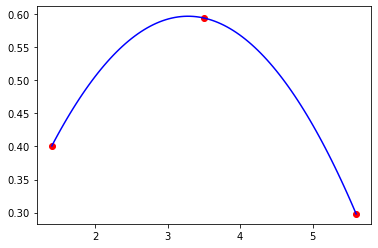

In [103]:
plt.scatter(X,Y,marker='o',color='red')
plt.plot(x,y,color='blue')


In [104]:
def function(x):
    return x*0.363970234266202 -0.0554912422401579*(x**2)


In [105]:
def Angle():
    theta=np.arctan(0.363970234266202)
    
    return theta

ang=Angle()*360/(2*np.pi)
ang

19.999999999999986

In [106]:
def GetSpeed(Theta,g=9.8):
    vel=(g/(2*0.0554912422401579*((np.cos(Angle()))**2)))**(1/2)
    return vel

speed=GetSpeed(ang)
speed
    

10.0

5

In [107]:
X_,Y_=cargar('Newton-Gregory.txt')
X_,Y_

([0.0, 1.5, 2.0, 3.8, 4.2, 5.9], [-18.0, -13.0, 0.0, 5.0, 3.0, 10.0])

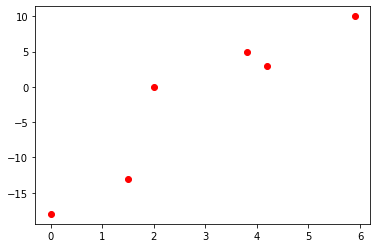

In [108]:
plt.scatter(X_,Y_,color='r',marker='o')

In [109]:
def newton_interpolation(X_param, Y_param, x):
       
    Diff = np.zeros((len(X_param),len(X_param)))
    Diff[:,0] = Y_param
    for i in range(1, len(X_param)):
        for j in range(i, len(X_param)):
            Diff[j,i] = (Diff[j,i-1] - Diff[j-1,i-1]) / (X_param[j] - X_param[j-i])

    y_new = np.zeros_like(x)
    for j, x_val in enumerate(x):
        p = 0
        for i in range(len(X_param)):
            term = Diff[i,i]
            for k in range(i):
                term *= (x_val - X_param[k])
            p += term
        y_new[j] = p

    return y_new

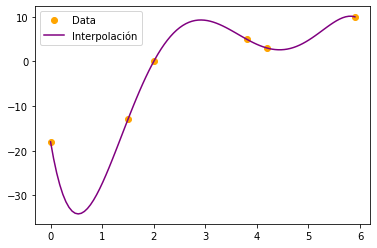

In [110]:
xt = np.linspace(X_[0],X_[-1],100)

yt = newton_interpolation(X_,Y_,xt)

plt.plot(X_, Y_, 'o',color="orange", label='Data')
plt.plot(xt, yt,color="purple", label='Interpolación')
plt.legend()
plt.show()

Integración 

1

Teniendo en cuenta la fórmula 3.85 para la integración por el método del trapecio simple, dada por:


$I= \int_{a}^{b}\! f(x) dx \cong \int_{a}^{b}\! p_{1}(x) dx = \frac{b-a}{2} * (f(a)+f(b))$

Sus respectivos pasos intermedios son:

$ \int_{a}^{b}\! f(x) dx \cong \int_{a}^{b}\! p_{1}(x) dx $\
\
$= \int_{a}^{b}\! (\frac{x-b}{a-b}*f(a) + \frac{x-a}{b-a}*f(b)) dx $\
\
$= \int_{a}^{b}\! (\frac{x-b}{a-b}*f(a)) dx + \int_{a}^{b}\! (\frac{x-a}{b-a}*f(b)) dx$\
\
$=f(a)*(\frac{x^2}{2(a-b)}-\frac{xb}{a-b})|_{a}^{b} + f(b)*(\frac{x^2}{2(b-a)}-\frac{xa}{b-a})|_{a}^{b}$\
\
$=f(a)*(\frac{b^2}{2(a-b)}-\frac{b^2}{a-b}-\frac{a^2}{2(a-b)}+\frac{ab}{a-b}) + f(b)*(\frac{-b^2}{2(a-b)}+\frac{ba}{a-b}+\frac{a^2}{2(a-b)}-\frac{a^2}{a-b})$\
\
$=f(a)*(\frac{-b^2}{2(a-b)}-\frac{a^2}{2(a-b)}+\frac{ab}{a-b}) + f(b)*)*(\frac{-b^2}{2(a-b)}-\frac{a^2}{2(a-b)}+\frac{ab}{a-b})$\
\
$= (\frac{-b^2}{2(a-b)}-\frac{a^2}{2(a-b)}+\frac{ab}{a-b})*(f(a)+f(b))$\
\
$= -(\frac{b^2 - 2ba + a^2}{2(a-b)})*(f(a)+f(b))$\
\
$= \frac{(b-a)^2}{2(b-a)}*(f(a)+f(b))$\
\
$=\frac{b-a}{2}*(f(a)+f(b))$

3

Teniendo en cuanta la fórmula 3.98, el método de Simpson simple está dado por:

$I= \int_{a}^{b}\! f(x) dx \cong \int_{a}^{b}\! p_{2}(x) dx = \frac{h}{3} * (f(a)+4f(x_{m})+f(b))$

y dado que $x_{m}=\frac{a+b}{2}$

Sus respectivos pasos intermedios son:

$I= \int_{a}^{b}\! \frac{(x-b)(x-x_{m})}{(a-b)(a-x_{m})}f(a) + \frac{(x-a)(x-b)}{(x_{m}-a)(x_{m}-b)}f(x_{m}) +\frac{(x-a)(x-x_{m})}{(b-a)(b-x_{m})}f(b)dx $\
\
$= \int_{a}^{b}\! \frac{(x-b)(\frac{2x-a-b}{2})}{(a-b)(\frac{2a-a-b}{2})}f(a) dx + \int_{a}^{b}\! \frac{(x-a)(x-b)}{(\frac{a+b-2a}{2})(\frac{a+b-2b}{b})}f(x_{m}) dx + \int_{a}^{b}\! \frac{(x-a)(\frac{2x-a-b}{2})}{(b-a)(\frac{2b-a-b}{2})}f(b) dx$\
\
$=\int_{a}^{b}\! \frac{2x^2 -ax-3bx+ab+b^2}{(a-b)^2}f(a) dx + (-4) \int_{a}^{b}\! \frac{x^2 -xb-xa+ab}{(a-b)^2}f(x_{m}) dx + \int_{a}^{b}\!\frac{2x^2 -3xa-xb+ab+a^2}{(b-a)^2}f(b) dx$\
\
$=\frac{f(a)}{(a-b)^2} (\frac{4x^3 -3ax^2 -9bx^2 +6abx +6xb^2}{6})|_{a}^{b} + \frac{-4*f(x_{m})}{(a-b)^2} (\frac{2x^3 -3bx^2 -3ax^2 +6abx }{6})|_{a}^{b} + \frac{f(b)}{(a-b)^2} (\frac{4x^3 -9ax^2 -3bx^2 +6abx +6xa^2}{6})|_{a}^{b}$ \
\
$=\frac{f(a)}{(a-b)^2} (\frac{4b^3 -3ab^2 -9b^3 +6ab^2 +6b^3 -4a^3 +3a^3 +9ba^2 -6ba^2 -6ab^2}{6}) + \frac{-4*f(x_{m})}{(a-b)^2} (\frac{2b^3 -3b^3 -3ab^2 +6ab^2 -2a^3 +3ba^2 +3a^3 -6ba^2}{6}) + \frac{f(b)}{(a-b)^2} (\frac{4b^3 -9ab^2 -3b^3 +6ab^2 +6ba^2 -4a^3 +9a^3 +3ba^2 -6ba^2 -6a^3}{6})$\
\
$=\frac{f(a)}{(a-b)^2}(\frac{b^3 -3ab^2 +3ba^2 -a^3 }{6}) + \frac{4*f(x_{m})}{(a-b)^2}(\frac{b^3 -3ab^2 +3ba^2 -a^3 }{6}) + \frac{f(b)}{(a-b)^2}(\frac{b^3 -3ab^2 +3ba^2 -a^3 }{6})$\
\
$=\frac{b^3 -3ab^2 +3ba^2 -a^3 }{6((a-b)^2)}(f(a)+4*f(x_{m})+f(b))$\
\
$=\frac{(b-a)^3}{6((b-a)^2)}(f(a)+4*f(x_{m})+f(b))$\
\
$=\frac{b-a}{6}(f(a)+4*f(x_{m})+f(b))$\
\
Si $h=\frac{b-a}{2}$, entonces:

$I=\frac{h}{3}(f(a)+4*f(x_{m})+f(b))$


7

In [111]:
n = 200
x = np.linspace(-1,1,n+1)
y = np.linspace(-1,1,n+1)

a = 0.
b = x[-1]

R = 1

In [112]:
def f(x,y,R=1.):
    
    z = R**2 - x**2 - y**2
    
    if z <= 0.:
        return 0.
    else:
        return np.sqrt(z)

In [113]:
f = np.vectorize(f)

In [114]:
X_e,Y_e = np.meshgrid(x,y)
Z = f(X_e,Y_e)
Z

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

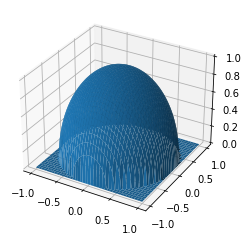

In [115]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X_e,Y_e,Z)

In [116]:
x = np.linspace(-1,1,n+1)
y = np.linspace(-1,1,n+1)
volumen=0
area=(x[1]-x[0])*(y[1]-y[0])

for i in range(len(x)):
    for j in range(len(y)):
        
        p_inicial=f(x[i],y[j])
        p_v1=f(x[i-1],y[j])
        p_v2=f(x[i-1],y[j-1])
        p_v3=f(x[i],y[j-1])
        
        if p_inicial in Z and p_v1 in Z and p_v2 in Z and p_v3 in Z:
            promedio=(p_inicial+p_v1+p_v2+p_v3)/4
            vol_i=promedio*area
            volumen+=vol_i
            
print(volumen)

2.0943195841075304


14

In [55]:
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)
n = 2

In [56]:
def function(x):
    func=3+5*x+x**2
    return func
print(function(x))

x**2 + 5*x + 3


In [69]:
roots, weights = np.polynomial.legendre.leggauss(n+1)

coefficients = []

for i in range(n+1):
    c_i = ((2*i+1)/2) * sum(weights[j] * function(x[j]) * np.polynomial.legendre.Legendre.basis(i)(roots[j]) for j in range(n+1))
    coefficients.append(c_i)
p_0=sym.Symbol('p_0(x)',real=True)
p_1=sym.Symbol('p_1(x)',real=True)
p_2=sym.Symbol('p_2(x)',real=True)
resp= coefficients[0]*p_0(x)+coefficients[1]*p_1(x)+coefficients[2]*p_2(x)
    



TypeError: 'Symbol' object is not callable

17

In [40]:
x = sym.Symbol('x',real=True)
def funcion(x):
    func=(x**3)/((np.e**x) -1)
    return func
funcion(x)

x**3/(2.71828182845905**x - 1)

a) Integrar

In [30]:
x = sym.Symbol('x',real=True)

In [31]:
n=3
Roots,Weights=np.polynomial.laguerre.laggauss(n)
print(Roots,Weights)

[0.41577456 2.29428036 6.28994508] [0.71109301 0.27851773 0.01038926]


In [38]:
a=0
b=1000
def gauss_integrate(n):
  gauss_int = 0
  c1 = 0.5*(b-a)
  c2 = 0.5*(a+b)

  gauss_int= c1*np.sum(Weights*funcion(c1*Roots + c2))
  
  return gauss_int

gauss_integrate(n)

C:\Users\lsper\AppData\Local\Temp/ipykernel_13044/1153563818.py:2: RuntimeWarning: overflow encountered in power
  func=(x**3)/((np.e**x) -1)


4.669280040848671e-297

In [39]:
integrate.fixed_quad(funcion,a,b,n=3)

C:\Users\lsper\AppData\Local\Temp/ipykernel_13044/1153563818.py:2: RuntimeWarning: overflow encountered in power
  func=(x**3)/((np.e**x) -1)


(4.5058540941152087e-41, None)

In [41]:
#preguntar

b) Plot

In [42]:
#preguntar

18

19